<a href="https://colab.research.google.com/github/Takshay20/Titanic-Data-Analysis/blob/main/Task3Mini_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Exploratory Data Analysis (EDA) on the Titanic dataset with
more advanced visualizations.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Import Libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline


Check Missing Data

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Cleaning

In [ ]:
# ✅ Clean DataFrame safely (works on all versions of pandas)

df = df.copy()  # ensure modifiable copy

# Drop Cabin if it exists
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# Fill missing Age safely
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing Embarked safely
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Confirm cleaning
print("✅ Missing values after cleaning:\n")
print(df.isnull().sum())


✅ Missing values after cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Feature Engineering

In [ ]:
# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create AgeGroup
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

df[['Age', 'AgeGroup', 'FamilySize']].head()


,Age,AgeGroup,FamilySize
0,22.0,Young Adult,2
1,38.0,Adult,2
2,26.0,Young Adult,1
3,35.0,Adult,2
4,35.0,Adult,1


**Exploratory Data Analysis (EDA)**

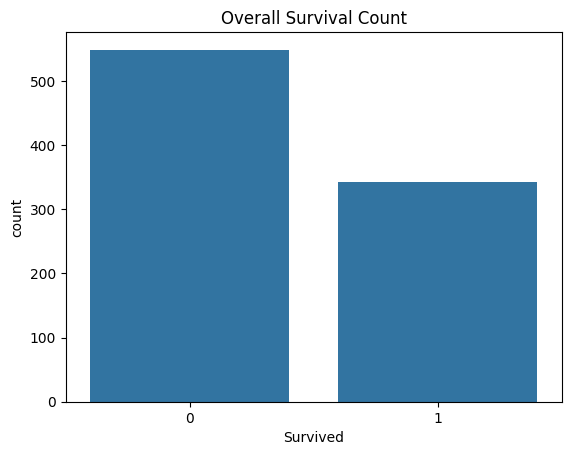

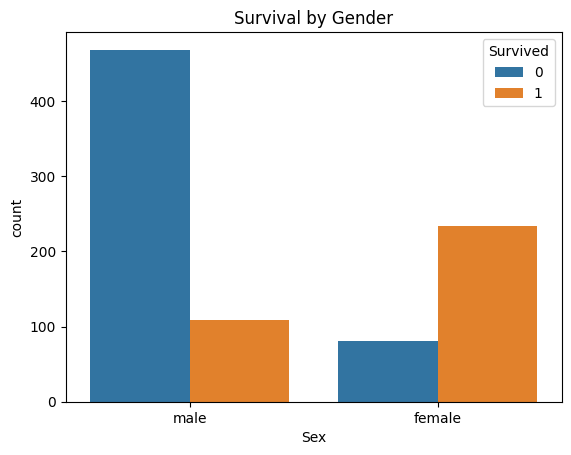

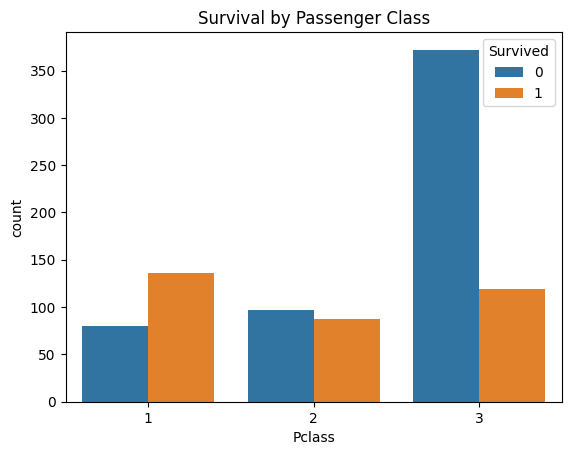

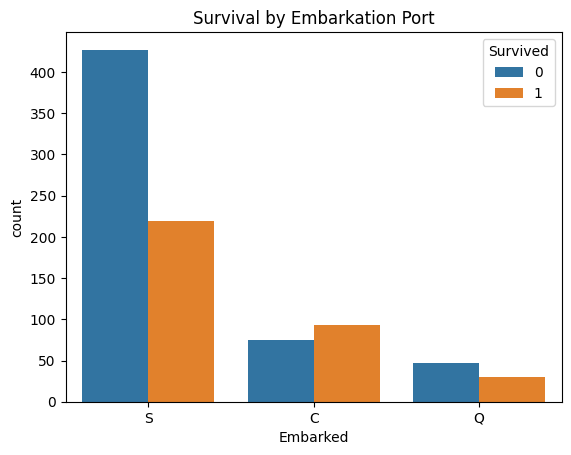

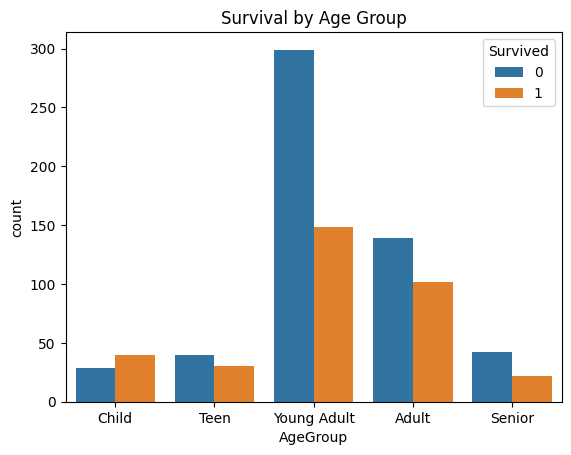

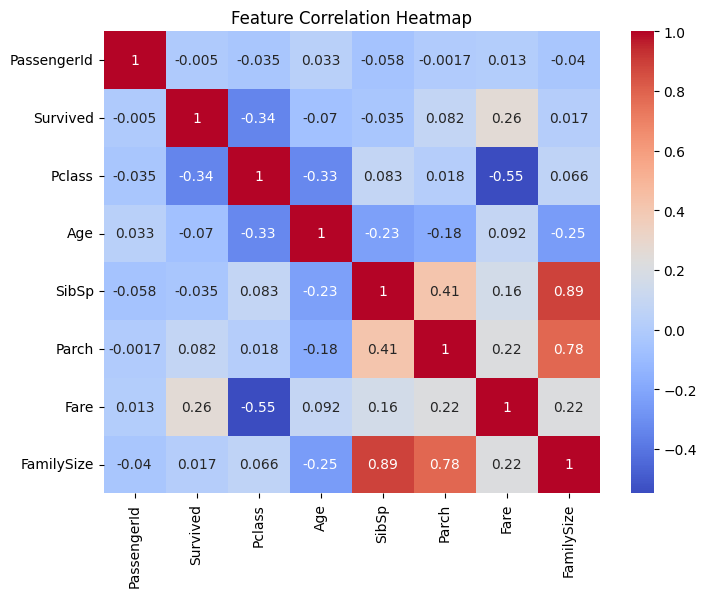

In [ ]:
# Survival count
sns.countplot(data=df, x='Survived')
plt.title('Overall Survival Count')
plt.show()

# Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

# Survival by class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# Survival by embarkation
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')
plt.show()

# Survival by age group
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title('Survival by Age Group')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Summary Insights

In [ ]:
print("✅ Key Insights:")
print("- Females had higher survival rate than males.")
print("- Passengers in 1st class survived more than 2nd or 3rd class.")
print("- Children (Age < 12) had higher survival chances.")
print("- Most passengers boarded from Southampton.")
print("- Family size of 2–4 had higher survival probability than solo travelers.")


✅ Key Insights:
- Females had higher survival rate than males.
- Passengers in 1st class survived more than 2nd or 3rd class.
- Children (Age < 12) had higher survival chances.
- Most passengers boarded from Southampton.
- Family size of 2–4 had higher survival probability than solo travelers.
